In [59]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
import distutils as _distutils
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import shap

CPU times: total: 0 ns
Wall time: 1 ms


In [60]:
churn_data = pd.read_csv(r"E:\Churn_DataSet.csv")

In [61]:
churn_data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [62]:
print("Number of Rows",churn_data.shape[0])
print("Number of Columns",churn_data.shape[1])

Number of Rows 10000
Number of Columns 14


In [63]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
#Checking null values
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [65]:
churn_data.isnull().sum()*100 / len(churn_data)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [66]:
churn_data = churn_data.dropna()

In [67]:
# Summary statistics of numerical variables
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


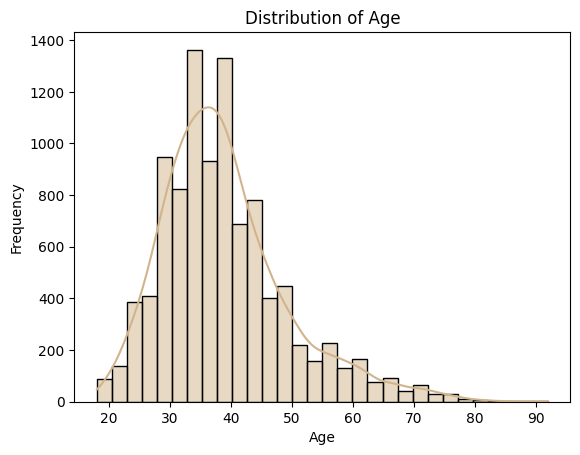

In [68]:
#Distribution of Age
sns.histplot(churn_data['Age'], bins=30, kde=True, color= '#D2B48C')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

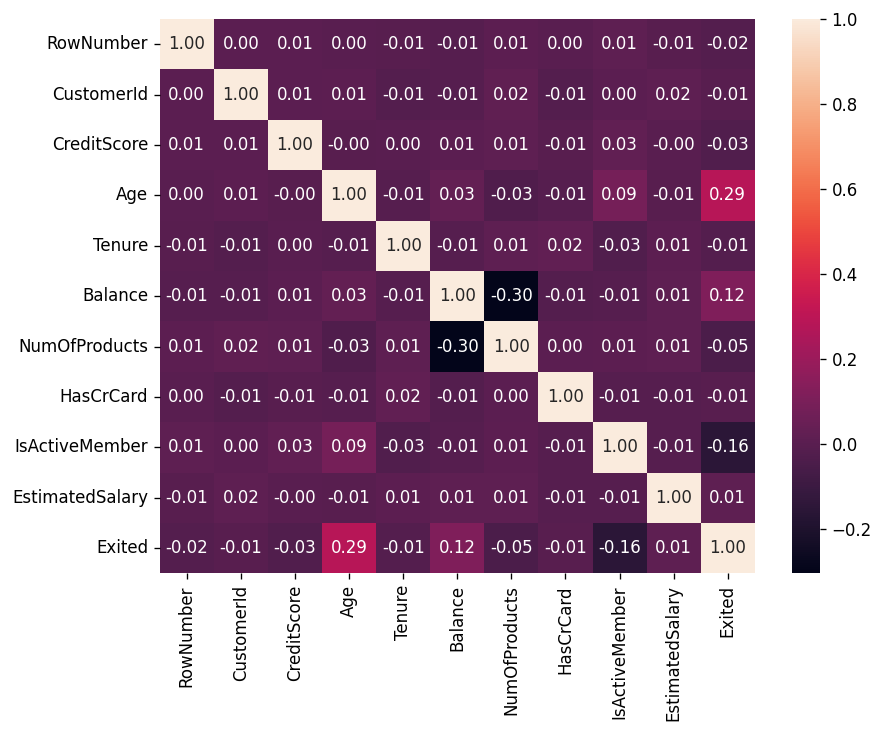

In [69]:
#Correlation matrix for numerical values
numerical_data = churn_data.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()

# Heatmap of correlation matrix
fig = plt.figure(figsize=(8,6), dpi = 120)
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
#plt.title('Correlation Heatmap')
plt.show()

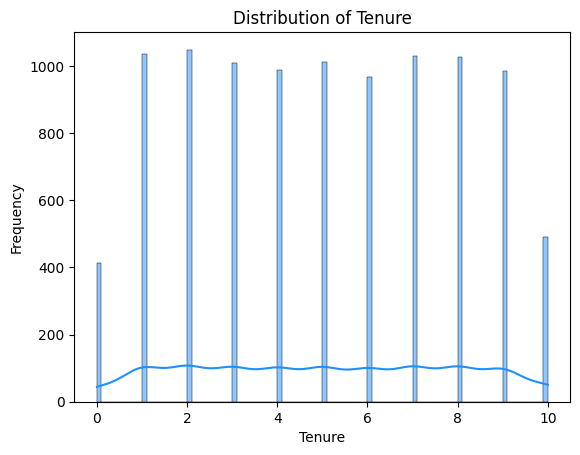

In [70]:
#Distribution of Tenure
sns.histplot(churn_data['Tenure'], bins=100, kde=True, color= '#1E90FF')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

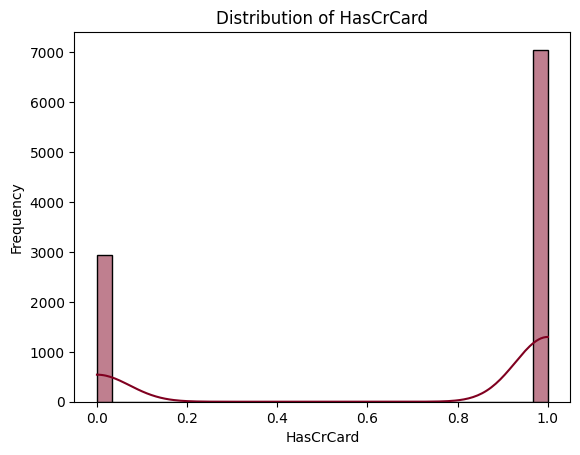

In [71]:
#Distribution of HasCrCard
sns.histplot(churn_data['HasCrCard'], bins=30, kde=True, color= '#800020')
plt.title('Distribution of HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Frequency')
plt.show()

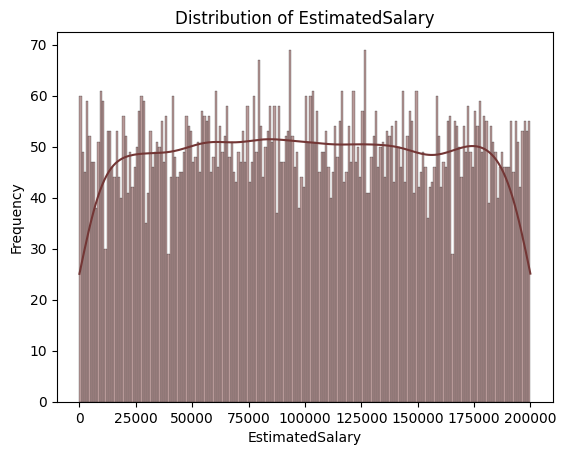

In [72]:
#Distribution of EstimatedSalary
sns.histplot(churn_data['EstimatedSalary'], bins=200, kde=True, color= '#733635')
plt.title('Distribution of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

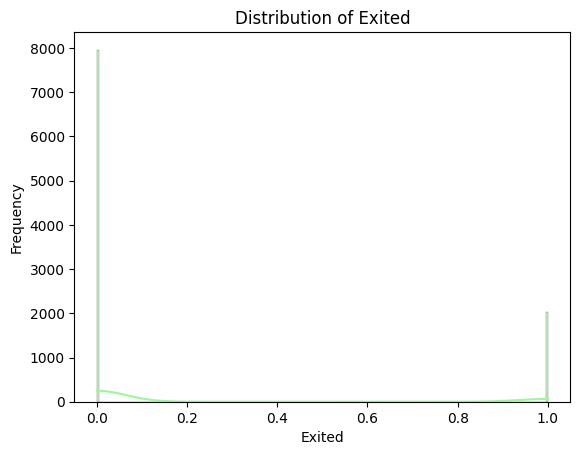

In [73]:
#Distribution of EstimatedSalary
sns.histplot(churn_data['Exited'], bins=200, kde=True, color= '#98FB98')
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.show()

In [74]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
# Define function to classify credit risk
def classify_Tenure(num_year):
    if num_year >=8:
        return "Very_Old_Customer"
    elif 5<=num_year<8:
        return "Old_Customer"
    elif 2<=num_year<5:
        return "Relatively_Old_Customer"
    else:
        return "New_Customer"
# Apply function to create 'Credit_risk_classification' column
churn_data['Tenure_Segmentation'] = churn_data['Tenure'].apply(classify_Tenure)

In [76]:
result = churn_data['Tenure_Segmentation'].value_counts()
df = result.reset_index(name = 'count')
#Add percentages column
df['percentage'] = round(df['count'] * 100/ df['count'].sum(),2)
print(df)

       Tenure_Segmentation  count  percentage
0  Relatively_Old_Customer   3046       30.46
1             Old_Customer   3007       30.07
2        Very_Old_Customer   2499       24.99
3             New_Customer   1448       14.48


C:\Users\abyaruhanga\AppData\Local\Temp\ipykernel_19548\4289574512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Tenure_Segmentation', y='percentage', palette=colors)


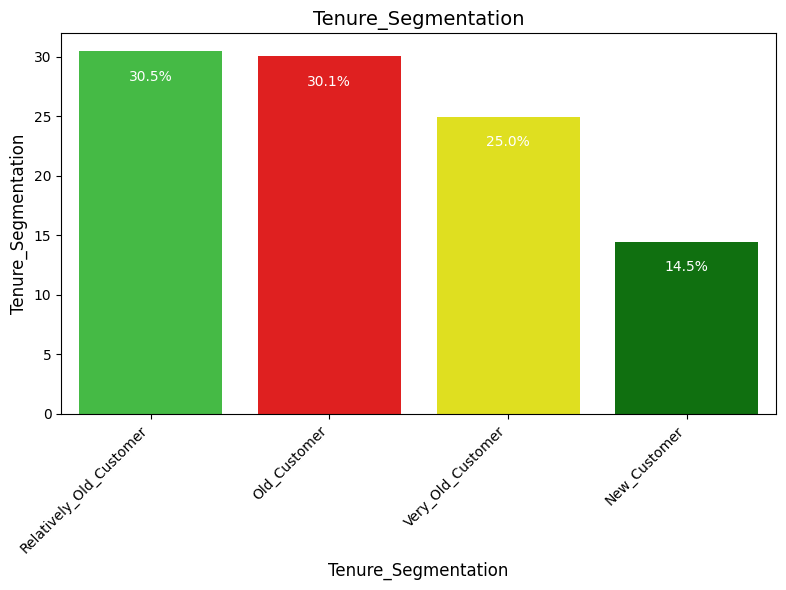

In [77]:
# Plot the histogram
colors = ['#32CD32','red','yellow','green'] # 'orange','chartreuse'
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Tenure_Segmentation', y='percentage', palette=colors)

# Annotate each bar with the number of orders inside the bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height - 2.5, f"{round(float(height),1)}%", ha="center", fontsize=10, color='white')

# Customize plot labels and title
plt.xlabel('Tenure_Segmentation', fontsize=12)
plt.ylabel('Tenure_Segmentation', fontsize=12)
plt.title('Tenure_Segmentation', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Segmentation
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Relatively_Old_Customer
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,New_Customer
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very_Old_Customer
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,New_Customer
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Relatively_Old_Customer


In [79]:
columns= ['RowNumber', 'Surname','CustomerId','Tenure']
churn_data = churn_data.drop(columns=columns, axis=1)

In [80]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Segmentation
0,619,France,Female,42,0.00,1,1,1,101348.88,1,Relatively_Old_Customer
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,New_Customer
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,Very_Old_Customer
3,699,France,Female,39,0.00,2,0,0,93826.63,0,New_Customer
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,Relatively_Old_Customer


In [81]:
df0 = churn_data['Gender'].value_counts()

In [82]:
df0.head()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [83]:
# Define function to bucket Age
def classify_Age(number):
    if number > 40:
        return 'Age > 40'
    elif 30 <= number <= 40:
        return 'Age 30 to 40'
    elif 20 <= number < 30:
        return 'Age 20 to 30'
    else:
        return 'Age < 20'

# Apply function to create 'Age_Bracket' column
churn_data['Age_Bracket'] = churn_data['Age'].apply(classify_Age)

In [84]:
Age_bracket_counts = churn_data.groupby(['Gender','Age_Bracket']).size().reset_index(name='Count')
print(Age_bracket_counts)

   Gender   Age_Bracket  Count
0  Female  Age 20 to 30    737
1  Female  Age 30 to 40   2089
2  Female      Age < 20     13
3  Female      Age > 40   1704
4    Male  Age 20 to 30    855
5    Male  Age 30 to 40   2689
6    Male      Age < 20     36
7    Male      Age > 40   1877


In [85]:
pivot_dat = Age_bracket_counts.pivot(index='Gender', columns='Age_Bracket', values='Count')

<Figure size 1800x1000 with 0 Axes>

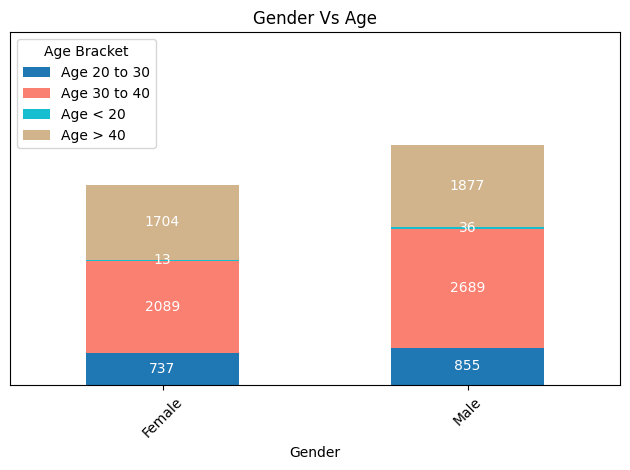

In [86]:
custom_colors = ['#1f77b4','salmon', '#17becf','#D2B48C']
plt.figure(figsize=(18, 10))
ax = pivot_dat.plot(kind='bar', stacked=True,color=custom_colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d',color='white')
plt.title('Gender Vs Age')
plt.xlabel('Gender')
#plt.ylabel('Count')
plt.legend(title='Age Bracket')
plt.xticks(rotation=45)
plt.ylim(0, 8000)
# Hide the y-axis
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

In [87]:
churn_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [88]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Segmentation,Age_Bracket
0,619,France,Female,42,0.00,1,1,1,101348.88,1,Relatively_Old_Customer,Age > 40
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,New_Customer,Age > 40
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,Very_Old_Customer,Age > 40
3,699,France,Female,39,0.00,2,0,0,93826.63,0,New_Customer,Age 30 to 40
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,Relatively_Old_Customer,Age > 40


In [89]:
Churn_classification = churn_data.groupby(['Exited','Tenure_Segmentation']).size().reset_index(name='Count')
print(Churn_classification)

   Exited      Tenure_Segmentation  Count
0       0             New_Customer   1121
1       0             Old_Customer   2425
2       0  Relatively_Old_Customer   2429
3       0        Very_Old_Customer   1988
4       1             New_Customer    327
5       1             Old_Customer    582
6       1  Relatively_Old_Customer    617
7       1        Very_Old_Customer    511


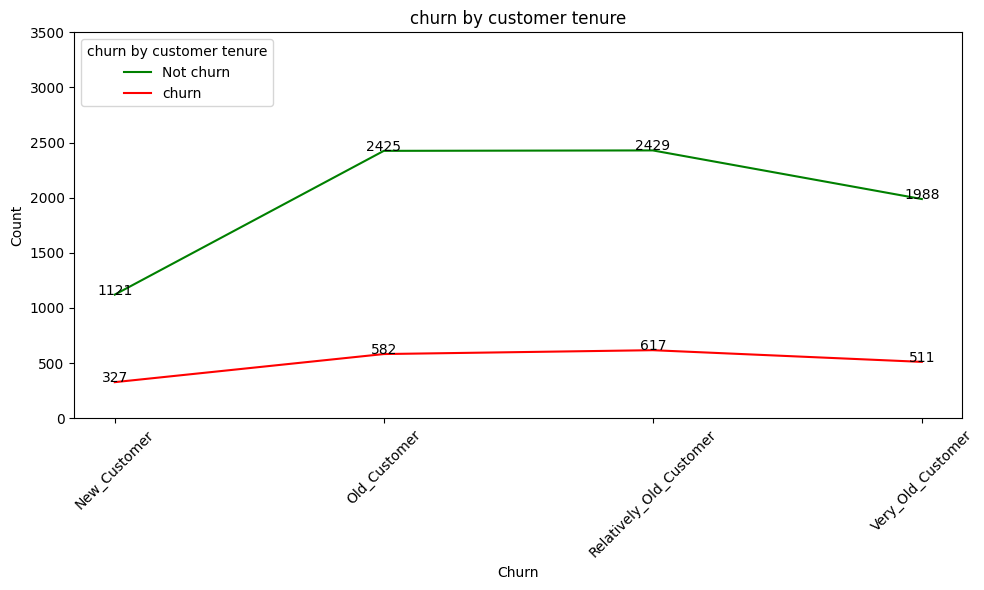

In [90]:
plt.figure(figsize=(10, 6))

# Line plot for "No churn"
sns.lineplot(data=Churn_classification[Churn_classification['Exited'] == 0],
             x='Tenure_Segmentation', y='Count', color='green', label='Not churn',linewidth=1.5)

# Line plot for "churn"
sns.lineplot(data=Churn_classification[Churn_classification['Exited'] == 1],
             x='Tenure_Segmentation', y='Count', color='red', label='churn',linewidth=1.5)

plt.title('churn by customer tenure')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='churn by customer tenure', loc='upper left')
plt.xticks(rotation=45)

for index, row in Churn_classification.iterrows():
    if row['Exited'] == 0:
        plt.text(row['Tenure_Segmentation'], row['Count'], str(row['Count']), color='black', fontsize=10, ha='center')
    else:
        plt.text(row['Tenure_Segmentation'], row['Count'], str(row['Count']), color='black', fontsize=10, ha='center')
plt.tight_layout()
plt.ylim(0, 3500)  # Set the y-axis limits as per your preference
plt.show()

In [91]:
# Define feature types
numeric_features = churn_data.select_dtypes(exclude='object').columns
categorical_features = churn_data.select_dtypes(include='object').columns

In [92]:
print(numeric_features)

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [93]:
print(categorical_features)

Index(['Geography', 'Gender', 'Tenure_Segmentation', 'Age_Bracket'], dtype='object')


In [94]:
#Long Short-Term Memory (LSTM)

In [95]:
#Dependent variable, y-vector
y = churn_data['Exited']

In [96]:
# Independent Variables
X_matrix = churn_data.drop(columns=['Exited'])

In [97]:
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = X_matrix.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')

X_encoded = encoder.fit_transform(X_matrix[columns_to_encode])

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

X_preprocessed = pd.concat([X_matrix.drop(columns=columns_to_encode), X_encoded_df], axis=1)

X_preprocessed.head()


from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X =st.fit_transform(X_preprocessed)

In [98]:
X

array([[-0.32622142,  0.29351742, -1.22584767, ..., -0.95654331,
        -0.07017213,  1.33884878],
       [-0.44003595,  0.19816383,  0.11735002, ..., -0.95654331,
        -0.07017213,  1.33884878],
       [-1.53679418,  0.29351742,  1.33305335, ..., -0.95654331,
        -0.07017213,  1.33884878],
       ...,
       [ 0.60498839, -0.27860412, -1.22584767, ...,  1.04543097,
        -0.07017213, -0.74691034],
       [ 1.25683526,  0.29351742, -0.02260751, ..., -0.95654331,
        -0.07017213,  1.33884878],
       [ 1.46377078, -1.04143285,  0.85996499, ..., -0.95654331,
        -0.07017213, -0.74691034]])

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [100]:
model = Sequential()
model.add(LSTM(units=50, 
               input_shape=(X_train_reshaped.shape[1], 
                            X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))  

c:\Users\abyaruhanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:

model.fit(X_train_reshaped, 
          y_train, epochs=50, 
          batch_size=32, 
          validation_split=0.2
         )

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7204 - loss: 0.6027 - val_accuracy: 0.8256 - val_loss: 0.4195
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.4217 - val_accuracy: 0.8338 - val_loss: 0.3972
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8291 - loss: 0.3986 - val_accuracy: 0.8400 - val_loss: 0.3851
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8395 - loss: 0.3796 - val_accuracy: 0.8419 - val_loss: 0.3726
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8480 - loss: 0.3648 - val_accuracy: 0.8481 - val_loss: 0.3624
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8477 - loss: 0.3566 - val_accuracy: 0.8519 - val_loss: 0.3557
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.3326 - val_accuracy: 0.8519 - val_loss: 0.3519
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.3478 - val_accuracy: 0.

In [103]:
#Predictions
y_predictions = model.predict(X_test_reshaped)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [104]:
y_predictions[0]

array([0.0251177], dtype=float32)

In [105]:
y_predictions = [1 if prediction > 0.5 else 0 for prediction in y_predictions]

In [106]:
y_predictions[0]

0

In [107]:
#Model evaluation for LSTM
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8587 - loss: 0.3531
Accuracy on test set: 85.50%


In [108]:
#Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [109]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000



In [110]:
conf_matrix = confusion_matrix(y_test,y_predictions)

In [111]:
conf_matrix

array([[1513,   94],
       [ 196,  197]], dtype=int64)

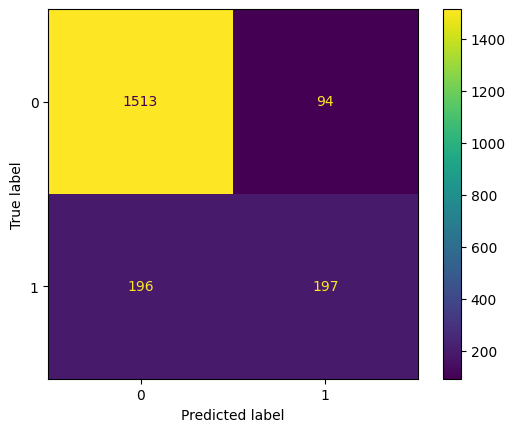

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()